# Episodic RL & Uncertainty: Experiment 1 with comprehension check, etc

Jonathan Nicholas and Daphna Shohamy

07/06/2018

*All analysis code is included at the end of the notebook*

---

In [219]:
global exclude_response
global exclude_blur

exclude_response = .6
exclude_blur = 100

int_data, exclude_pids = loadData(dType="interaction")
exclude_pids = map(int,exclude_pids)
data = loadData(dType="experiment")[0]
agg_data = aggregateTestData(data=data, exclude_pids=exclude_pids)
print("N= %s"%(len(agg_data.pid.unique())))

95916 had 1 blurs
40350 had 1 blurs
81612 had 7 blurs
59584 had 36 blurs
65534 had 1 blurs
94368 had 2 blurs
18653 had 0 blurs
58407 had 2 blurs
23667 had 0 blurs
95741 had 28 blurs
51543 had 1 blurs
31458 had 32 blurs
20533 had 6 blurs
88256 had 0 blurs
56194 had 1 blurs
65728 had 6 blurs
82393 had 23 blurs
83085 had 0 blurs
25246 had 61 blurs
60637 had 3 blurs
74273 had 0 blurs
64749 had 2 blurs
23165 had 0 blurs
85672 had 5 blurs
67831 had 0 blurs
47689 had 2 blurs
18420 had 1 blurs
73108 had 4 blurs
70316 had 25 blurs
18337 had 19 blurs
94310 had 0 blurs
60718 had 0 blurs
45989 had 15 blurs
16624 had 8 blurs
49523 had 1 blurs
76246 had 0 blurs
93136 had 36 blurs
78221 had 3 blurs
20217 had 1 blurs
33400 had 2 blurs
37212 had 11 blurs
28226 had 5 blurs
65501 had 10 blurs
51146 had 0 blurs
41860 had 3 blurs
95057 had 0 blurs
12914 had 2 blurs
40788 had 8 blurs
45895 had 3 blurs
97923 had 10 blurs
87296 had 3 blurs
29804 had 5 blurs
22998 had 1 blurs
95616 had 4 blurs
65779 had 0 blur

In [220]:
n_blurs = int_data[int_data.event == "blur"] \
            .groupby(['subjectID','event']) \
            .size() \
            .reset_index(name="n_blurs")
    
def get_blurs(x):
    if str(x) in n_blurs.subjectID.unique():
        pid_blurs = n_blurs[n_blurs.subjectID == str(x)].n_blurs.iloc[0]
        return pid_blurs
    else:
        # if not there, then they don't have any blurs
        return 0

agg_data['n_blurs'] = agg_data['pid'].apply(get_blurs)

In [221]:
# Let's make a hierarchical linear model

import statsmodels.api as sm
import statsmodels.formula.api as smf

model = "pOld ~ n_blurs + propResponse + bonus*value*reliability"
# model = "pOld ~ n_blurs + propResponse + value*reliability"
# model = "pOld ~ n_blurs + propResponse + bonus*value"

md = smf.mixedlm(model,agg_data, groups=agg_data["pid"])

mdf = md.fit()
print(mdf.summary())

                         Mixed Linear Model Regression Results
Model:                        MixedLM            Dependent Variable:            pOld   
No. Observations:             228                Method:                        REML   
No. Groups:                   57                 Scale:                         0.0200 
Min. group size:              4                  Likelihood:                    45.5220
Max. group size:              4                  Converged:                     Yes    
Mean group size:              4.0                                                      
---------------------------------------------------------------------------------------
                                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------
Intercept                                     0.888    0.778  1.142 0.254 -0.637  2.414
value[T.low]                                  1.281    0.

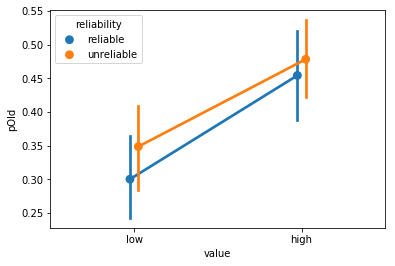

In [212]:
sns.pointplot(x='value',y='pOld',hue='reliability',
              data=agg_data,order=['low','high'],dodge=True)
plt.show()

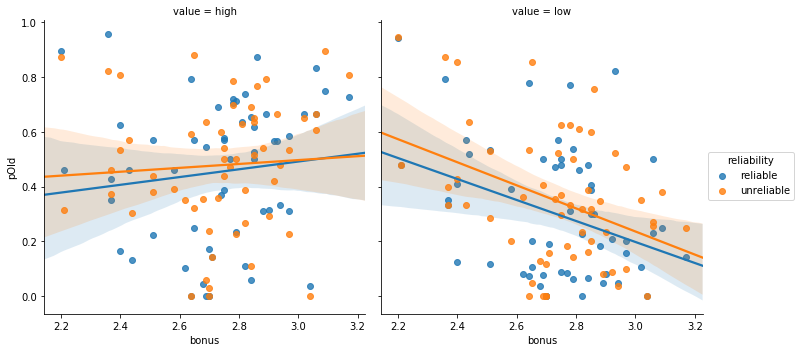

In [213]:
sns.lmplot(x='bonus',y='pOld',hue='reliability',col='value',data=agg_data)

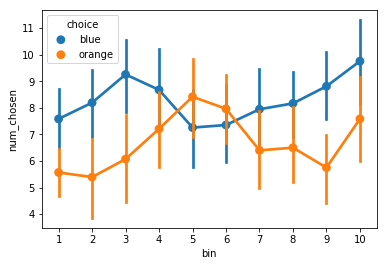

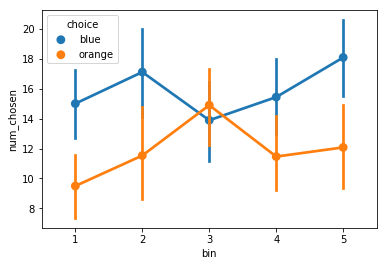

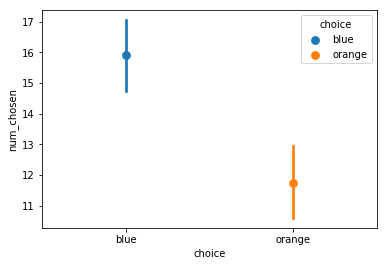

In [197]:
# Trials split into 10 bins
relOut = binChoices(data=data,n_bins=10,trialType='reliability')
sns.pointplot(x="bin",y="num_chosen",hue="choice",data=relOut)

# Trials split into 5 bins
plt.figure()
relOut = binChoices(data=data,n_bins=5,trialType='reliability')
sns.pointplot(x="bin",y="num_chosen",hue="choice",data=relOut)

# averages
plt.figure()
sns.pointplot(x="choice",y="num_chosen",hue="choice",data=relOut)

plt.show()

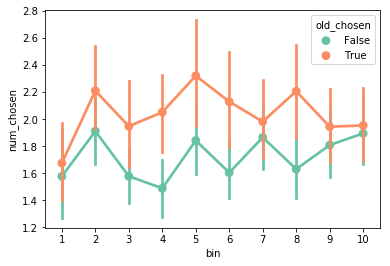

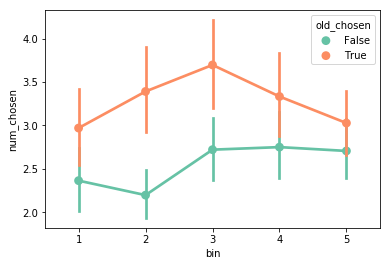

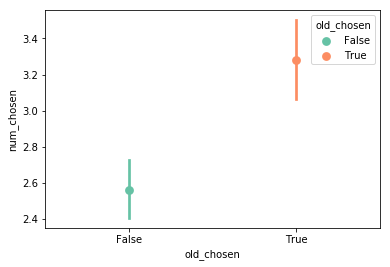

In [192]:
# Trials split into 10 bins
objOut = binChoices(data=data,n_bins=10,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="old_chosen",data=objOut,palette="Set2")

# Trials split into 5 bins
plt.figure()
objOut = binChoices(data=data,n_bins=5,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="old_chosen",data=objOut,palette="Set2")

# averages
plt.figure()
sns.pointplot(x="old_chosen",y="num_chosen",hue="old_chosen",data=objOut,palette="Set2")

plt.show()

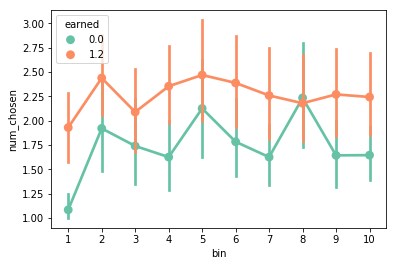

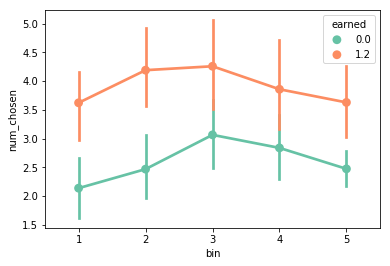

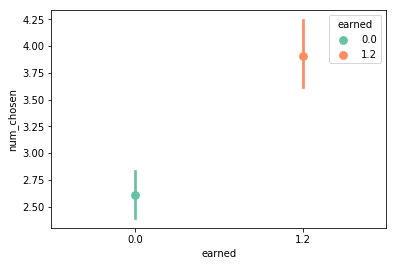

In [185]:
# Trials split into 10 bins
objOut = binChoices(data=data,n_bins=10,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="earned",data=objOut[objOut.old_chosen==True],palette="Set2")

# Trials split into 5 bins
plt.figure()
objOut = binChoices(data=data,n_bins=5,trialType='object')
sns.pointplot(x="bin",y="num_chosen",hue="earned",data=objOut[objOut.old_chosen==True],palette="Set2")

# averages
plt.figure()
sns.pointplot(x="earned",y="num_chosen",hue="earned",data=objOut[objOut.old_chosen==True],palette="Set2")

plt.show()


In [217]:
# Importing packages
%matplotlib inline
from __future__ import division
import warnings, os
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_generative(nTimepoints):
    reliableDist = np.round_(np.random.normal(0.6,0.05,nTimepoints),decimals=2)
    unreliableDist = np.round_(np.random.normal(0.6,0.2,nTimepoints),decimals=2)

    sns.distplot(reliableDist)
    sns.despine()
    plt.text(0.7,7,'Reliable',color='blue')
    sns.distplot(unreliableDist)
    plt.text(0.7,2.2,'Unreliable',color='orange')
    plt.plot([0,0],[0,10],'k--')
    plt.text(0.05,7,'Low value object',color='black')
    plt.plot([1.2,1.2],[0,10],'k--')
    plt.text(1.25,7,'High value object',color='black')
    plt.title('Outcome Generative Distributions')
    
def loadData(dType=None,dataDir="/Users/jonathan/shohamylab/jspych-exps/data",fileType="stateData"):
    data, exclude_pids = [], [] 
    dataFiles = [d for d in os.listdir(dataDir) if dType in d]
    for f in dataFiles:
        subData = pd.read_csv(os.path.join(dataDir,f))
        if dType == "interaction":
            
#             if 'fullscreenexit' in subData.event.unique():
#                 print('fullscreenexit on trial: ',subData[subData.event == 'fullscreenexit'].trial.iloc[0])
            if len(subData[subData.event == 'blur']) >= exclude_blur:
                exclude = ": EXCLUDE"
                exclude_pids.append(f.split('_')[0])
            else:
                exclude = ""
            print("%s had %s blurs%s"%(f.split('_')[0],len(subData[subData.event == 'blur']),exclude))
            subData['subjectID'] = [f.split('_')[0]] * len(subData)
        elif dType == "experiment":
            bonus = float(f.split('_')[2].replace('bonus',''))
            subData['bonus'] = [bonus] * len(subData)
        data.append(subData)
    data = pd.concat(data,ignore_index=True)
    return data, exclude_pids


def aggregateTestData(data=None, exclude_pids=None):
    
    pids = data.subjectID.unique()

    dOut = {'reliability':[],'value':[],'pOld':[],'pid':[],'bonus':[],'propResponse':[]}
    for pid in pids:

        train_data = data[(data.test_part == 'train') & (data.subjectID == pid)]
        test_data = data[(data.test_part == 'test') & (data.subjectID == pid)]

        bonus = test_data.bonus.mean()

        nTrials = len(train_data)+len(test_data)

        cleaned_train = train_data[train_data.choice != 'no_response']
        cleaned_test = test_data[test_data.choice != 'no_response']

        nResponded = len(cleaned_train)+len(cleaned_test)
        proportionResponse = nResponded/nTrials
        
        if proportionResponse < exclude_response:
            exclude = ": EXCLUDE"
        else:
            exclude = ""
        print("%s responded to %s%s "%(pid,proportionResponse,exclude))

        old_test = cleaned_test[cleaned_test.old_trial == True]
        old_chosen = old_test[old_test.choice == 'object']

        if proportionResponse >= exclude_response and pid not in exclude_pids:

            colors = ['blue','orange']
            values = ['1.20','0.00']

            for c in colors:
                for v in values:
                    nTotal = len(old_test[(old_test.deck_type == c) & (old_test.old_value == v)])
                    nChosen = len(old_chosen[(old_chosen.deck_type == c) & (old_chosen.old_value == v)])

                    pOld = nChosen/nTotal

                    if c == 'blue':
                        rel = 'reliable'
                    else:
                        rel = 'unreliable'

                    if v == '1.20':
                        val = 'high'
                    else:
                        val = 'low'

                    dOut['reliability'].append(rel)
                    dOut['value'].append(val)
                    dOut['pOld'].append(pOld)
                    dOut['pid'].append(pid)
                    dOut['bonus'].append(bonus)
                    dOut['propResponse'].append(proportionResponse)

    dOut = pd.DataFrame.from_dict(dOut)
    return dOut

def binChoices(data=None, n_bins=None, trialType=None):
    
    pids = data.subjectID.unique()
    
    relOut = []
    for pid in pids:

        test_data = data[(data.test_part == 'train') & (data.subjectID == pid)]
        train_data = data[(data.test_part == 'train') & (data.subjectID == pid)]

        bonus = train_data.bonus.mean()

        nTrials = len(train_data)+len(test_data)

        cleaned_train = train_data[train_data.choice != 'no_response'].reset_index()
        cleaned_test = test_data[test_data.choice != 'no_response'].reset_index()

        cleaned_train.loc[cleaned_train['choice'].str.contains('object'), 'choice'] = 'object'

        currBin = 0
        binWidth = int(len(cleaned_train)/n_bins)
        bins = []
        for i_row, row in cleaned_train.iterrows():
            if i_row % binWidth == 0:
                if currBin != n_bins:
                    currBin+=1

            bins.append(currBin)
        cleaned_train['bin'] = bins

        nResponded = len(cleaned_train)+len(cleaned_test)
        proportionResponse = nResponded/nTrials

        if proportionResponse >= exclude_response and pid not in exclude_pids:
            if trialType == "reliability":
                rel_chosen = cleaned_train[cleaned_train.choice != "object"].groupby(['bin','choice']).size().reset_index(name="num_chosen")
            elif trialType == "object":
                rel_chosen = cleaned_train[(cleaned_train.choice == "object") &
                                           (cleaned_train.old_trial == True)].groupby(['bin','earned','old_chosen']).size().reset_index(name="num_chosen")
            rel_chosen['pid'] = [pid] * len(rel_chosen)
            relOut.append(rel_chosen)

    relOut = pd.concat(relOut)
    if trialType == "object": relOut['earned'] = relOut['earned'].convert_objects(convert_numeric=True)
    return relOut